<a href="https://colab.research.google.com/github/DiegoPuentes/MachineLearning/blob/main/R2_A13_S14_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

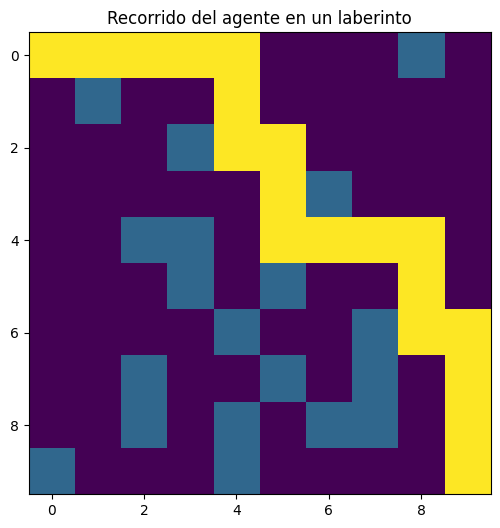

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Configuración del laberinto
def crear_laberinto(tamaño, obstaculos):
    laberinto = np.zeros((tamaño, tamaño), dtype=int)
    for _ in range(obstaculos):
        x, y = random.randint(0, tamaño-1), random.randint(0, tamaño-1)
        laberinto[x, y] = 1
    laberinto[0, 0] = 0  # Punto inicial
    laberinto[-1, -1] = 2  # Meta
    return laberinto

laberinto = crear_laberinto(100, 3000)

# Parámetros del Q-Learning
alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.1
num_episodios = 1000
acciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Arriba, Abajo, Izquierda, Derecha

# Inicialización de la tabla Q
Q = np.zeros((100, 100, len(acciones)))

# Función para elegir una acción
def elegir_accion(estado, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, len(acciones) - 1)
    else:
        return np.argmax(Q[estado])

# Validación de movimiento
def mover(estado, accion):
    x, y = estado
    dx, dy = acciones[accion]
    nx, ny = x + dx, y + dy
    if 0 <= nx < laberinto.shape[0] and 0 <= ny < laberinto.shape[1] and laberinto[nx, ny] != 1:
        return (nx, ny)
    return estado

# Entrenamiento del agente
for episodio in range(num_episodios):
    estado = (0, 0)
    while estado != (99, 99):
        accion = elegir_accion(estado, epsilon)
        nuevo_estado = mover(estado, accion)
        recompensa = 1 if laberinto[nuevo_estado] == 2 else -0.1
        Q[estado][accion] += alpha * (recompensa + gamma * np.max(Q[nuevo_estado]) - Q[estado][accion])
        estado = nuevo_estado
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Evaluación del modelo
estado = (0, 0)
camino = [estado]

while estado != (99, 99):
    accion = np.argmax(Q[estado])
    estado = mover(estado, accion)
    camino.append(estado)

# Visualización del laberinto y el camino
laberinto_viz = laberinto.copy()
for x, y in camino:
    laberinto_viz[x, y] = 3

plt.figure(figsize=(10, 10))
plt.imshow(laberinto_viz, cmap="viridis")
plt.title("Recorrido del agente")
plt.show()
